In [51]:
# importing Dependencies
import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
# Specifying the path to the .csv data files
file_path1 = os.path.join("raw_data", "ride_data.csv")
file_path2 = os.path.join("raw_data", "city_data.csv" )
file_path1

'raw_data\\ride_data.csv'

In [64]:
# opening and reading the data files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df = pd.DataFrame.merge(df1,df2, on="city", how = "left")

#computing and setting the variables
average_fare_data=[]

average_fare_data = df1.groupby(["city"]).sum()["fare"].rename("Total_Fare")
av_data = pd.DataFrame(average_fare_data)
av_data = av_data.reset_index()
av_data


df4 = pd.merge(df2,av_data, on = "city")
df4 = df4.sort_values("city", ascending = True)
df4 = df4.reset_index()
df4

average_count = df1.groupby("city").count()["fare"].rename("ride_count")
average_count
av_count=pd.DataFrame(average_count)
av_count=av_count.reset_index("city")

# Creating a merged Dataframe
df5 = pd.merge(df4,av_count,on="city")
#df5 = df5.sort_values("city", ascending = True)
#df5 = df5.reset_index()
df5

average_fare = df1.groupby(["city"]).mean()["fare"].rename("average_fare")
average_fare
av_fare=pd.DataFrame(average_fare)
av_fare=av_fare.reset_index("city")
av_fare
df6 = pd.merge(df5, av_fare, on="city")
df6

,index,city,driver_count,type,Total_Fare,ride_count,average_fare
0,65,Alvarezhaven,21,Urban,741.79,31,23.928710
1,18,Alyssaberg,67,Urban,535.85,26,20.609615
2,95,Anitamouth,16,Suburban,335.84,9,37.315556
3,53,Antoniomouth,21,Urban,519.75,22,23.625000
4,43,Aprilchester,49,Urban,417.65,19,21.981579
5,24,Arnoldview,41,Urban,778.30,31,25.106452
6,101,Campbellport,26,Suburban,505.67,15,33.711333
7,66,Carrollbury,4,Suburban,366.06,10,36.606000
8,12,Carrollfort,55,Urban,736.47,29,25.395517
9,104,Clarkstad,21,Suburban,372.62,12,31.051667


In [65]:
urban = df6[df6["type"] == "Urban"]

rural = df6[df6["type"] =="Rural"]

suburban = df6[df6["type"] =="Suburban"]


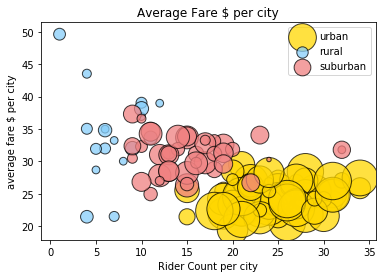

In [71]:
plt.title("Average Fare $ per city")
plt.xlabel("Rider Count per city")
plt.ylabel("average fare $ per city")

plt.scatter( urban["ride_count"], urban["average_fare"], s=urban["driver_count"]*20, marker = 'o', c = '#FFD700' ,edgecolors='black', alpha=0.75,label ='urban');
plt.scatter( rural["ride_count"], rural["average_fare"], s=rural["driver_count"]*20, marker = 'o', c = '#87CEFA' ,edgecolors='black',  alpha = 0.75, label='rural');
plt.scatter( suburban["ride_count"], suburban["average_fare"], s=suburban["driver_count"]*20, marker = 'o', c = '#F08080' ,edgecolors='black',  alpha = 0.75, label='suburban');
plt.legend()
plt.show()

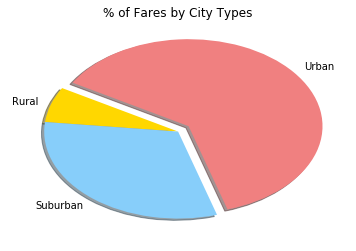

In [59]:
#Pie Charts
#* % of Total Fares by City Type
percent_by_type = df.groupby("type").sum()["fare"]/df["fare"].sum() * 100

plt.pie(percent_by_type,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       shadow = True,
        startangle = 150)
plt.title("% of Fares by City Types")

plt.show()

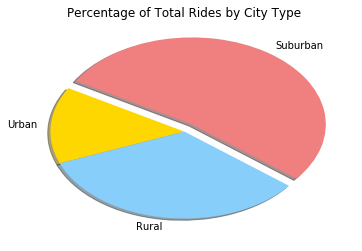

In [37]:
#Pie Charts
# % of Total Rides by City Type
percent_total_rides = (df6.groupby(["type"]).count()["ride_count"]/df6["ride_count"].count())*100

plt.pie(percent_total_rides,
       labels = ["Urban", "Rural", "Suburban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0,0,0.1],
       shadow = True,
       startangle = 150)
plt.title("Percentage of Total Rides by City Type")

plt.show()

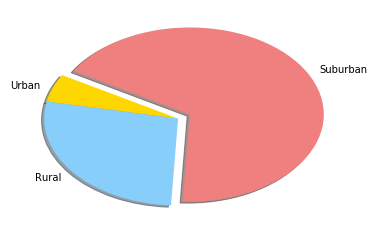

In [38]:
#Pie Charts
# % of Total Drivers by City Type
percent_total_drivers = (df.groupby(["type"]).count()["driver_count"]/df["driver_count"].count())*100

plt.pie(percent_total_drivers,
       colors = ["gold", "lightskyblue", "lightcoral"],
       labels = ["Urban", "Rural", "Suburban"],
       explode = [0,0,0.1],
       shadow = True,
       startangle = 150)

plt.show()